## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "week-5-matplotlib_homework_Instructions_Pymaceuticals_data_Mouse_metadata.csv"
study_results_path = "week-5-matplotlib_homework_Instructions_Pymaceuticals_data_Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mice = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
combined_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
number_of_mice = combined_mice['Mouse ID'].nunique()
number_of_mice


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_mice[combined_mice.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = combined_mice[combined_mice.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_df = combined_mice[combined_mice['Mouse ID'] != 'g989']
new_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_count = new_df['Mouse ID'].nunique()
clean_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_table = new_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median_table = new_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance_table = new_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
std_table = new_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem_table = new_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
table_df = pd.DataFrame({'Mean': mean_table,
                        'Median': median_table,
                        'Variance':variance_table,
                        'STD':std_table,
                        'SEM': sem_table,
                        })
table_df

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
Agg_table = new_df.groupby('Drug Regimen')
table2_df = Agg_table.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
table2_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

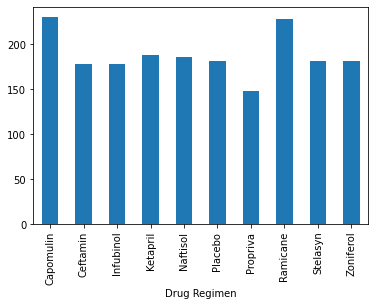

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
barplot_pandas = new_df.groupby('Drug Regimen').count()['Mouse ID']
barchart = barplot_pandas.plot.bar()
barchart



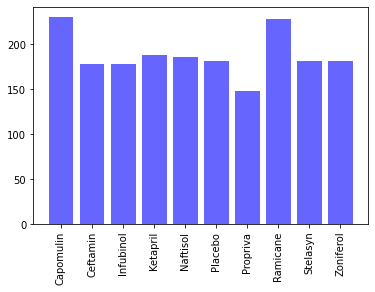

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(0, len(barplot_pandas))
tick_locations = [value+0.4 for value in x_axis]
plt.bar(x_axis, barplot_pandas, color='b', alpha=0.6, align="edge")
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'], rotation="vertical")
plt.show()

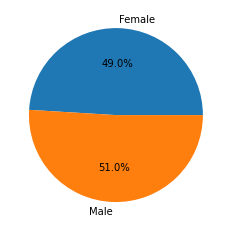

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pieplot = new_df.groupby('Sex').count()['Mouse ID']
gender = ['Female', 'Male']
plt.pie(pieplot, labels=gender, autopct="%1.1f%%")
plt.show()


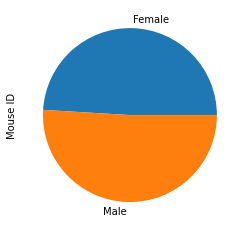

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
piechart = pieplot.plot.pie()
piechart


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drugs = new_df[new_df['Drug Regimen'].isin(drug_list)]
last_tumor = drugs.groupby(['Drug Regimen','Mouse ID']).agg(\
    last_tumor_size=('Tumor Volume (mm3)',lambda x: x.iloc[-1])).round(3)
last_tumor




# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


last_tumor_size
Drug Regimen Mouse ID                 
Capomulin    b128               38.983
             b742               38.940
             f966               30.486
             g288               37.074
             g316               40.159
...                                ...
Ramicane     s508               30.276
             u196               40.668
             w678               43.166
             y449               44.183
             z578               30.639

[100 rows x 1 columns]

In [26]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in drug_list:
    quartiles = last_tumor.loc[drug,].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles.iloc[0,0].round(2)
    upperq = quartiles.iloc[2,0].round(2)
    iqr = upperq-lowerq
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
   
    print(f"{drug} IQR data is:")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {(quartiles.iloc[1,0])} ")
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")
    print(f"--------------------------------------------------------")
   
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Capomulin IQR data is:
The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.779999999999994
The the median of Capomulin is: 38.12 
Values below 20.71 for Capomulin could be outliers.
Values above 51.83 for Capomulin could be outliers.
--------------------------------------------------------
Ramicane IQR data is:
The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.099999999999998
The the median of Ramicane is: 36.56 
Values below 17.91 for Ramicane could be outliers.
Values above 54.31 for Ramicane could be outliers.
--------------------------------------------------------
Infubinol IQR data is:
The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.480000000000004
The the median of Infubinol is: 60.16 
Values below 36.83 for Infubinol could be outliers.
Values above 82.7

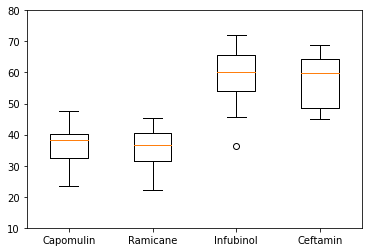

In [50]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_df = last_tumor.reset_index()
tumor_lists = final_df.groupby('Drug Regimen')['last_tumor_size'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(drug_list)
tumor_vols = [vol for vol in tumor_list_df['last_tumor_size']]
plt.boxplot(tumor_vols, labels=drug_list)
plt.ylim(10, 80)
plt.show()

## Line and Scatter Plots

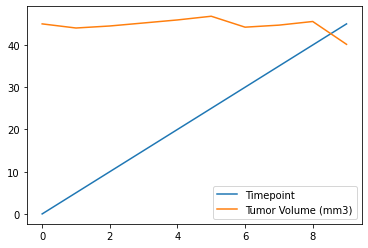

In [65]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
volume_vs_time = new_df[new_df["Mouse ID"].isin(["g316"])]
volume_vs_time_data = volume_vs_time[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
line_plot_df = volume_vs_time_data.reset_index()
line_plot_final = line_plot_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
lines = line_plot_final.plot.line()


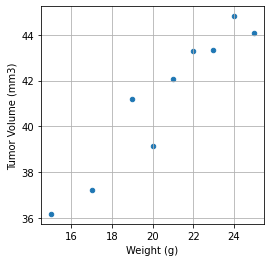

In [88]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_capomulin = new_df[new_df["Drug Regimen"].isin(["Capomulin"])]
scatter_capomulin_df = scatter_capomulin[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]
capomulin_scatter_plot = scatter_capomulin.reset_index()
capomulin_sorted = capomulin_scatter_plot.sort_values(["Weight (g)"], ascending=True)
capomulin_grouped_weight = capomulin_scatter_plot.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()
capomulin_grouped_plot = pd.DataFrame(capomulin_grouped_weight).reset_index()
capomulin_scatter = capomulin_grouped_plot.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True, figsize= (4,4))
capomulin_scatter

## Correlation and Regression

Text(0, 0.5, 'Tumor Volume (mm3)')

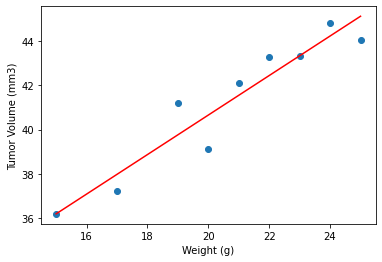

In [103]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = capomulin_grouped_plot["Weight (g)"]
y_values = capomulin_grouped_plot["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values) 
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")